In [6]:
import pyslim
import tskit
import numpy as np
import argutils
import matplotlib.pyplot as plt

Load our tree sequence from SLiM

In [2]:
ts = tskit.load('../slim/output/simple_space.trees')
ts

Simplify down to a few individuals

In [62]:
# sample diploid individuals
# alive_inds = pyslim.individuals_alive_at(ts, 0)
# rng = np.random.default_rng(seed=3)
# keep_indivs = rng.choice(alive_inds, 5, replace=False)
# keep_nodes = []
# for i in keep_indivs:
#     keep_nodes.extend(ts.individual(i).nodes)
# sample genomes
keep_nodes = np.random.choice(ts.samples(), 10, replace=False)
sts = ts.simplify(samples=keep_nodes, keep_input_roots=True, keep_unary=True, )
sts

Simplify down to a smaller genomic region (so we have fewer trees)

In [63]:
ssts = sts.keep_intervals(np.array([[0,1e5]]))
ssts

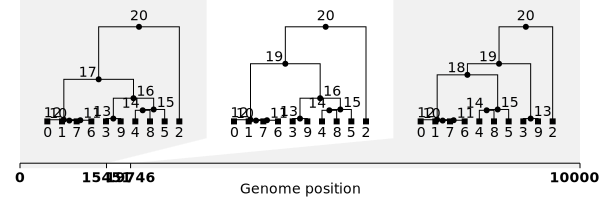

In [64]:
ssts.draw_svg()

Use functions from https://github.com/tskit-dev/what-is-an-arg-paper to draw the ARG from this simplified treesequence (like their fig 4)

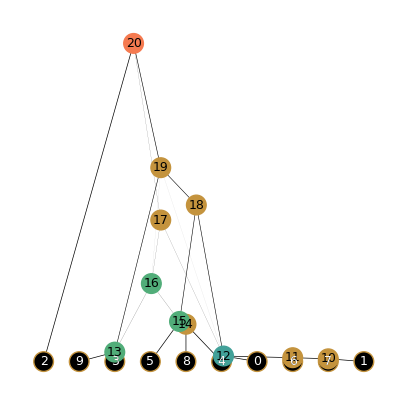

In [65]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
pos, G = argutils.viz.draw(
    ssts,
    ax1,
    draw_edge_widths=True,
    use_ranked_times=False,
    node_arity_colors=True,
)

This is very nice -- it shows that the SLiM treesequence does indeed contain all the info we need (i.e., it can record the ARG).

Get locations of the sample nodes

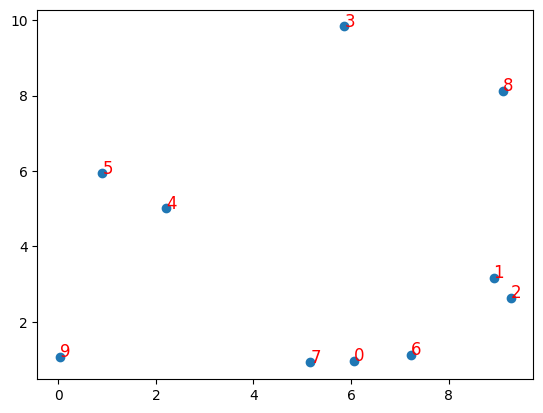

In [66]:
sample_locs = np.array([pyslim.individual_locations(ssts)[ssts.node(i).individual] for i in ssts.samples()])

plt.scatter(sample_locs[:,0], sample_locs[:,1])
for i,(x,y) in enumerate(zip(sample_locs[:,0], sample_locs[:,1])):
    plt.text(x, y, str(i), color="red", fontsize=12)
plt.show()

Now, how do we work with this ARG? ie, to build the covariance matrix?

Do we work with the networkx graph?

In [39]:
G

Or with the tskit treesequence?

Note, as described in the what-is-an-arg paper, the info about recombination is within the edges, not nodes.

In [26]:
[i for i in ssts.edges()]

[Edge(left=0.0, right=100000.0, parent=10, child=4, metadata=b'', id=0),
 Edge(left=0.0, right=100000.0, parent=10, child=9, metadata=b'', id=1),
 Edge(left=0.0, right=100000.0, parent=11, child=2, metadata=b'', id=2),
 Edge(left=0.0, right=100000.0, parent=11, child=3, metadata=b'', id=3),
 Edge(left=0.0, right=100000.0, parent=12, child=7, metadata=b'', id=4),
 Edge(left=0.0, right=100000.0, parent=12, child=10, metadata=b'', id=5),
 Edge(left=0.0, right=100000.0, parent=13, child=5, metadata=b'', id=6),
 Edge(left=0.0, right=100000.0, parent=13, child=8, metadata=b'', id=7),
 Edge(left=0.0, right=100000.0, parent=14, child=0, metadata=b'', id=8),
 Edge(left=0.0, right=100000.0, parent=14, child=6, metadata=b'', id=9),
 Edge(left=0.0, right=100000.0, parent=15, child=12, metadata=b'', id=10),
 Edge(left=0.0, right=100000.0, parent=15, child=13, metadata=b'', id=11),
 Edge(left=0.0, right=100000.0, parent=16, child=1, metadata=b'', id=12),
 Edge(left=0.0, right=100000.0, parent=16, ch

In [30]:
[i for i in ssts.nodes()]

[Node(id=0, flags=1, time=0.0, population=0, individual=1, metadata={'slim_id': 2549704, 'is_null': False, 'genome_type': 0}),
 Node(id=1, flags=1, time=0.0, population=0, individual=1, metadata={'slim_id': 2549705, 'is_null': False, 'genome_type': 0}),
 Node(id=2, flags=1, time=0.0, population=0, individual=3, metadata={'slim_id': 2549864, 'is_null': False, 'genome_type': 0}),
 Node(id=3, flags=1, time=0.0, population=0, individual=3, metadata={'slim_id': 2549865, 'is_null': False, 'genome_type': 0}),
 Node(id=4, flags=1, time=0.0, population=0, individual=0, metadata={'slim_id': 2549678, 'is_null': False, 'genome_type': 0}),
 Node(id=5, flags=1, time=0.0, population=0, individual=0, metadata={'slim_id': 2549679, 'is_null': False, 'genome_type': 0}),
 Node(id=6, flags=1, time=0.0, population=0, individual=2, metadata={'slim_id': 2549718, 'is_null': False, 'genome_type': 0}),
 Node(id=7, flags=1, time=0.0, population=0, individual=2, metadata={'slim_id': 2549719, 'is_null': False, 'gen

I'm more familiar with tskit so I'd try to work with the treesequence. 

Or if you want to work with ARGs from a non-spatial model, for ease/speed, you can do this with msprime

In [1]:
import msprime

In [15]:
ts = msprime.sim_ancestry(samples=2, population_size=1e4, sequence_length=1e3, recombination_rate=1e-8, record_full_arg=True ,random_seed=1)
ts

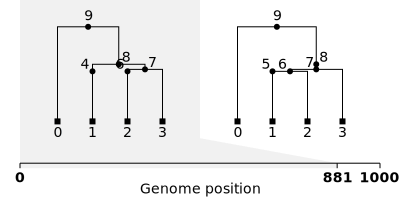

In [16]:
ts.draw_svg()